In [38]:
# 로이터 뉴스 데이터 load, 뉴스 기사, 분류

from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train),(x_test, y_test) = reuters.load_data(num_words=1000,
                                                        test_split = 0.2)

In [3]:
print(len(np.unique(y_train)))

46


In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [5]:
print(x_train.shape, x_test.shape)

(8982, 100) (2246, 100)


In [6]:
y = to_categorical(y_train)
#y_test = to_categorical(y_test)
y_train.shape

(8982,)

In [7]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100,activation = 'tanh'))
model.add(Dense(46,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train,y_train,epochs=200, batch_size=20,validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/200
450/450 [==============================] - 20s 41ms/step - loss: 2.2054 - accuracy: 0.4344 - val_loss: 2.0188 - val_accuracy: 0.4893
Epoch 2/200
450/450 [==============================] - 18s 41ms/step - loss: 1.6997 - accuracy: 0.5573 - val_loss: 1.6511 - val_accuracy: 0.5757
Epoch 3/200
450/450 [==============================] - 19s 42ms/step - loss: 1.5526 - accuracy: 0.5959 - val_loss: 1.5479 - val_accuracy: 0.6051
Epoch 4/200
450/450 [==============================] - 19s 42ms/step - loss: 1.3945 - accuracy: 0.6495 - val_loss: 1.3697 - val_accuracy: 0.6670
Epoch 5/200
450/450 [==============================] - 19s 42ms/step - loss: 1.2372 - accuracy: 0.6874 - val_loss: 1.3072 - val_accuracy: 0.6692
Epoch 6/200
450/450 [==============================] - 19s 42ms/step - loss: 1.1196 - accuracy: 0.7170 - val_loss: 1.2272 - val_accuracy: 0.6963
Epoch 7/200
450/450 [==============================] - 19s 43ms/step - loss: 1.0373 - accuracy: 0.7384 - val_loss: 1.1912 - val_ac

In [10]:
print('test 데이터의 정확도 : ', model.evaluate(x_test, y_test)[1])

71/71 [==============================] - 1s 17ms/step - loss: 1.2751 - accuracy: 0.7195
test 데이터의 정확도 :  0.7195013165473938


In [11]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

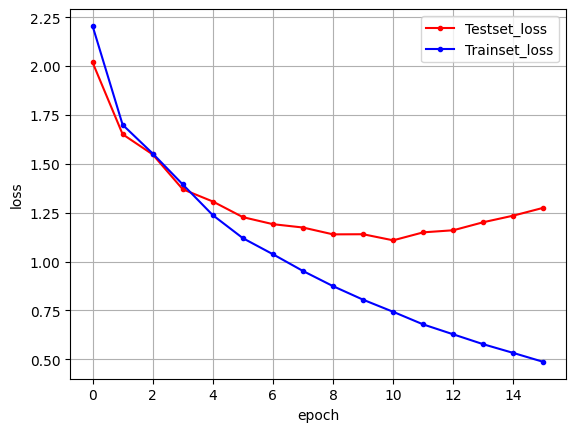

In [13]:
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [24]:
## LSTM과 CNN을 활용한 데이터 분석 (영화 리뷰 - 긍정 / 주정)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,MaxPooling1D, Conv1D, LSTM, Embedding
from tensorflow.keras.datasets import imdb # 영화 리뷰 자료
from tensorflow.keras.preprocessing import sequence # pad_sequences 활용하기 위해
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd



In [15]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

print(X_train.shape, y_train.shape)

17464789/17464789 [==============================] - 2s 0us/step
(25000,) (25000,)


In [16]:
# 단어의 수를 맞춤 -> sequence.pad_sequences(데이터, 사이즈)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [17]:
# 모델 생성
model = Sequential()
model.add(Embedding(5000, 100)) # 단어 임베딩
model.add(Dropout(0.5)) # 노드 꺼줌(50%)
model.add(Conv1D(64,5,activation = 'relu'))
model.add(MaxPooling1D(4)) # maxpooling -> 25%로 줄어듬
model.add(LSTM(55)) # node 수
model.add(Dense(1, activation = 'sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience= 3)
## 모델 실행
history = model.fit(X_train, y_train, batch_size= 40, epochs= 200, validation_split=0.25, callbacks= [early_stopping])

Epoch 1/200
469/469 [==============================] - 47s 96ms/step - loss: 0.4064 - accuracy: 0.7985 - val_loss: 0.2707 - val_accuracy: 0.8906
Epoch 2/200
469/469 [==============================] - 47s 100ms/step - loss: 0.2372 - accuracy: 0.9087 - val_loss: 0.2662 - val_accuracy: 0.8890
Epoch 3/200
469/469 [==============================] - 49s 104ms/step - loss: 0.1877 - accuracy: 0.9299 - val_loss: 0.2682 - val_accuracy: 0.8914
Epoch 4/200
469/469 [==============================] - 48s 102ms/step - loss: 0.1490 - accuracy: 0.9453 - val_loss: 0.2791 - val_accuracy: 0.8922
Epoch 5/200
469/469 [==============================] - 48s 102ms/step - loss: 0.1145 - accuracy: 0.9603 - val_loss: 0.3518 - val_accuracy: 0.8810


In [21]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

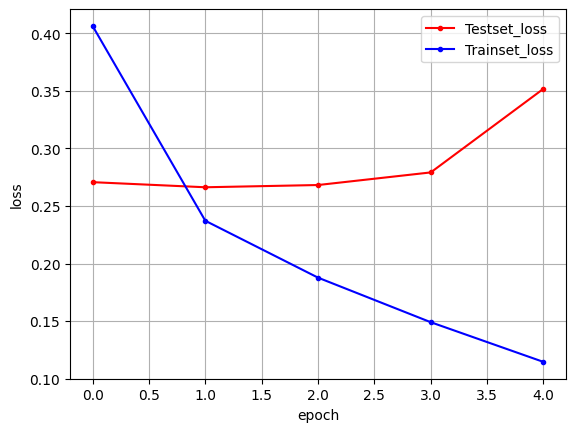

In [22]:
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [128]:
data_train = pd.read_table('./data/ratings_train.txt')
data_test =  pd.read_table('./data/ratings_test.txt')

In [129]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [130]:
data_train['document'].value_counts()

document
굿                                                                                                  181
good                                                                                                92
최고                                                                                                  85
쓰레기                                                                                                 79
별로                                                                                                  66
                                                                                                  ... 
이런거 만드는 색휘는 진짜 일부로 욕처묵고싶어서 환장한색휘인듯                                                                   1
이영화 평점이 궁금해서 왔는데.너무높다..^^                                                                            1
시청자들에게 사과하세여 제작진..낚시성 예고 지친다..보기싫음 말아라 하고 만듬?조세호씨 때문에 넘웃기게 보는데요 낚시그만하시고 예고와 본방이 이어지는 연출부탁드립니다..      1
여태본 영화중 단연 최고                                                   

In [131]:
data_train.drop_duplicates(subset=['document'], inplace = True)

In [132]:
data_train['document'].value_counts()

document
아 더빙.. 진짜 짜증나네요 목소리                                                                            1
여러분은 지금 톰하디의 BMW광고를 보고계십니다                                                                     1
무슨 성교육용 비디오도 아니고 이건 대체..                                                                       1
여 형사 죽일때 부터 직쏘의 코드에서 벗어나 있었다 아만다로 인해 쏘우를 버리고 단순한 삼류 고어물로 바뀜                                    1
재미없어요..진심입니다                                                                                   1
                                                                                              ..
이게 왜 수작이라는지 도저히 이해가 안되는 ...                                                                    1
이 영화는 강우석 박찬욱영화보다 어떤의미에서는 정말 뛰어나다고 생각하는 1인. 한국 최고의 영화감독 윤성호.정말 주인공이 윤성호감독과 말하는스타일이 너무 비슷해서.    1
쎄다.                                                                                            1
ㅋㅋ진짜 재밌게 봤음 ㅋ                                                                                  1
한국 영화 최초로 수간하는 내용이 담긴

In [133]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146183 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        146183 non-null  int64 
 1   document  146182 non-null  object
 2   label     146183 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.5+ MB


In [134]:
# 한글을 제외한 문자를 '' 로 변경
data_train['document'] = data_train['document'].str.replace(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 " "]', 
                                                          '', regex=True)
# '' 를 np.nan  으로 변경 -> nan 을 제거
data_train['document'].replace('', np.nan, inplace=True)
data_train.dropna(inplace=True)

print(len(data_train))

145795


In [135]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145795 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        145795 non-null  int64 
 1   document  145795 non-null  object
 2   label     145795 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.4+ MB


In [136]:
x_train = data_train['document']
y_train = data_train['label']

In [137]:
# 1. 토큰화

token = Tokenizer()
token.fit_on_texts(x_train) # 리뷰 단어 토큰화

In [138]:
# 토큰한 결과를 가지고 인덱스로 문장을 변환
x = token.texts_to_sequences(x_train) # 문장의 단어를 token한 결과 단어의 인덱스로 변환

In [139]:
padd_x = pad_sequences(x, 50)

In [140]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [141]:
data_test.drop_duplicates(subset=['document'], inplace = True)

In [142]:
data_test['document'].value_counts()

document
굳 ㅋ                                                                                                                                            1
4대강 살리긴는 절대로 안돼지라잉. 우덜 영산강만 살리면 돼제. 4대강 살리기 운운하는 넘있으면 배때지 쑤셔불고 민주화 시켜부러야돼. 카악퉤~~~                                                              1
영화라고 부르기도 힘든 졸작                                                                                                                                1
요즘엔 운널사 덕분에 행복한한주를 보내여!!..장혁씨의 연기력에 늘 박수를 보내며 스토리 진짜 짱!!!!..장나라씨도 넘 이쁘고 착하구 연기도 잘하시구,,조주연분들역시짱..나쁜 악역이 판치지않아 보는내내 힐링+해피랍니다...ㅎㅎ이런좋은잘품볼수있어쌩유    1
웃음도 안나오는 개판.                                                                                                                                   1
                                                                                                                                              ..
정말 재미있었습니다. 앞으로도 좋은 이야기 부탁드려요~^^ 프로포즈대작전 파이팅!                                                                            

In [143]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49158 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49158 non-null  int64 
 1   document  49157 non-null  object
 2   label     49158 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [144]:
# 한글을 제외한 문자를 '' 로 변경
data_test['document'] = data_test['document'].str.replace(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 " "]', 
                                                          '', regex=True)
# '' 를 np.nan  으로 변경 -> nan 을 제거
data_test['document'].replace('', np.nan, inplace=True)
data_test.dropna(inplace=True)

print(len(data_test))

48995


In [145]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48995 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        48995 non-null  int64 
 1   document  48995 non-null  object
 2   label     48995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [146]:
# 모델 생성
model = Sequential()
model.add(Embedding(len(token.word_index) + 1, 8)) # 단어 임베딩
model.add(Dropout(0.5)) # 노드 꺼줌(50%)
model.add(Conv1D(64,5,activation = 'relu'))
model.add(MaxPooling1D(4)) # maxpooling -> 25%로 줄어듬
model.add(LSTM(55)) # node 수
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 8)           2396144   
                                                                 
 dropout_6 (Dropout)         (None, None, 8)           0         
                                                                 
 conv1d_6 (Conv1D)           (None, None, 64)          2624      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 55)                26400     
                                                                 
 dense_7 (Dense)             (None, 1)                 56        
                                                      

In [147]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [148]:
early_stopping = EarlyStopping(monitor='val_loss', patience= 3)
## 모델 실행
history = model.fit(padd_x, y_train, batch_size= 40, epochs= 200, validation_split=0.25, callbacks= [early_stopping])

Epoch 1/200
2734/2734 [==============================] - 76s 27ms/step - loss: 0.5802 - accuracy: 0.6627 - val_loss: 0.5144 - val_accuracy: 0.7212
Epoch 2/200
2734/2734 [==============================] - 74s 27ms/step - loss: 0.4303 - accuracy: 0.7796 - val_loss: 0.5170 - val_accuracy: 0.7242
Epoch 3/200
2734/2734 [==============================] - 71s 26ms/step - loss: 0.3375 - accuracy: 0.8275 - val_loss: 0.5499 - val_accuracy: 0.7200
Epoch 4/200
2734/2734 [==============================] - 71s 26ms/step - loss: 0.2927 - accuracy: 0.8481 - val_loss: 0.5906 - val_accuracy: 0.7158


In [159]:
x_test = data_test['document']
y_test = data_test['label']

In [160]:
# 1. 토큰화
token.fit_on_texts(x_test) # 리뷰 단어 토큰화

In [161]:
# 토큰한 결과를 가지고 인덱스로 문장을 변환
x_test_1 = token.texts_to_sequences(x_test) # 문장의 단어를 token한 결과 단어의 인덱스로 변환

In [162]:
padd_x_test = pad_sequences(x_test_1, 50)

In [163]:
print(model.evaluate(padd_x_test,y_test)[1])

1532/1532 [==============================] - 4s 3ms/step - loss: 1.2593 - accuracy: 0.5163
0.5162567496299744
